In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
SHOP = wb.DataReader('SHOP',data_source='yahoo',start='2015-03-05')

In [3]:
SHOP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-20,17.000000,17.000000,17.000000,17.000000,0,17.000000
2015-05-21,28.740000,24.110001,28.000000,25.680000,12303900,25.680000
2015-05-22,31.100000,26.000000,26.070000,28.309999,2841200,28.309999
2015-05-26,30.340000,29.080000,29.799999,29.650000,820200,29.650000
2015-05-27,30.809999,27.000000,30.670000,27.500000,797600,27.500000


In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
tickers = ['SHOP','TSLA','AAPL','MSFT','LMT','NVDA', '^GSPC']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo',start='2015-03-04')['Adj Close']

In [6]:

mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1327 entries, 2015-05-20 to 2020-08-25
Data columns (total 7 columns):
SHOP     1327 non-null float64
TSLA     1327 non-null float64
AAPL     1327 non-null float64
MSFT     1327 non-null float64
LMT      1327 non-null float64
NVDA     1327 non-null float64
^GSPC    1327 non-null float64
dtypes: float64(7)
memory usage: 82.9 KB


In [7]:
mydata.head()

,SHOP,TSLA,AAPL,MSFT,LMT,NVDA,^GSPC
Date,,,,,,,
2015-05-20,17.000000,244.350006,119.648712,42.957211,168.137405,20.434868,2125.850098
2015-05-21,25.680000,245.619995,120.872238,42.812748,168.015625,20.289181,2130.820068
2015-05-22,28.309999,247.729996,121.930191,42.343269,167.798096,20.260042,2126.060059
2015-05-26,29.650000,247.460007,119.243912,42.063393,165.753448,20.133781,2104.199951
2015-05-27,27.500000,247.429993,121.470222,42.984295,166.484283,21.211857,2123.479980


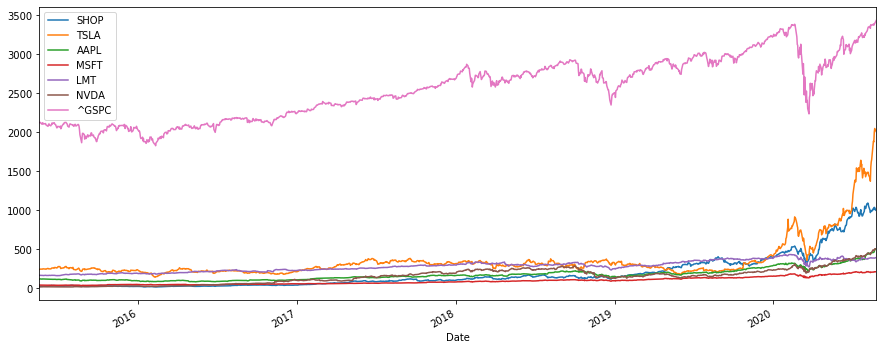

In [8]:

mydata.plot(figsize = (15,6))
plt.show()

In [9]:
weights = np.array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714])


In [10]:
returns = (mydata/mydata.shift(1)) - 1
returns.head()


,SHOP,TSLA,AAPL,MSFT,LMT,NVDA,^GSPC
Date,,,,,,,
2015-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-21,0.510588,0.005197,0.010226,-0.003363,-0.000724,-0.007129,0.002338
2015-05-22,0.102414,0.008591,0.008753,-0.010966,-0.001295,-0.001436,-0.002234
2015-05-26,0.047333,-0.001090,-0.022031,-0.006610,-0.012185,-0.006232,-0.010282
2015-05-27,-0.072513,-0.000121,0.018670,0.021893,0.004409,0.053546,0.009163


In [11]:
np.dot(returns, weights)

array([       nan, 0.07387614, 0.01483241, ..., 0.01471456, 0.00046926,
       0.0032802 ])

In [12]:

annual_returns = returns.mean() * 250
annual_returns

SHOP     0.933227
TSLA     0.542830
AAPL     0.310580
MSFT     0.341920
LMT      0.188190
NVDA     0.712816
^GSPC    0.108874
dtype: float64

In [13]:
np.dot(annual_returns, weights)


0.44834816438159314

In [14]:

portfolio_1 = str(round(np.dot(annual_returns, weights),5) * 100) + '%' 
print (portfolio_1)

44.835%


In [15]:
weights_2 = np.array([0.25,0.15,0.12,0.12,0.12,0.12,0.12])
portfolio_2 = str(round(np.dot(annual_returns, weights_2),5) * 100) + '%'
print (portfolio_2)
print (portfolio_1)


51.422000000000004%
44.835%


In [16]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

tickers = ['^GSPC','^IXIC','^GDAXI','^NYA','^DJI']
index_data = pd.DataFrame()
for t in tickers:
    index_data[t] = wb.DataReader(t,data_source='yahoo',start='2015-03-04')['Adj Close']


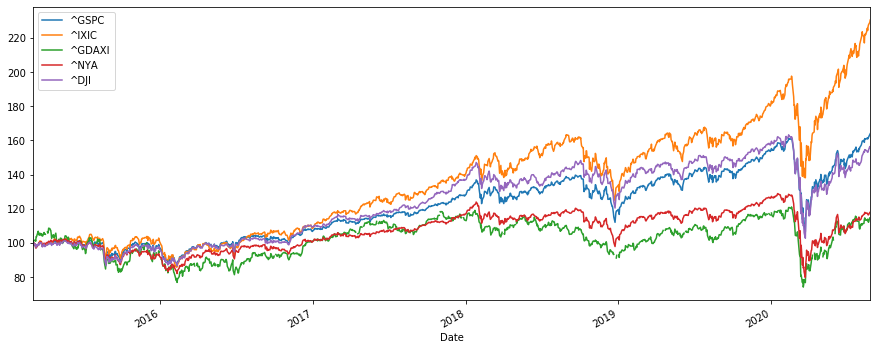

In [17]:
(index_data/index_data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [18]:
index_returns = (index_data/index_data.shift(1)) - 1
index_returns.head()

,^GSPC,^IXIC,^GDAXI,^NYA,^DJI
Date,,,,,
2015-03-04,NaN,NaN,NaN,NaN,NaN
2015-03-05,0.001196,0.003155,0.009976,0.000871,0.002145
2015-03-06,-0.014174,-0.011126,0.004082,-0.015624,-0.015381
2015-03-09,0.003944,0.003058,0.002696,0.002255,0.007781
2015-03-10,-0.016961,-0.016722,-0.007057,-0.017320,-0.018492


In [19]:

annual_index_returns = index_returns.mean() * 250
annual_index_returns

^GSPC     0.107218
^IXIC     0.172636
^GDAXI    0.043475
^NYA      0.047169
^DJI      0.099799
dtype: float64

In [20]:
# Comparing SHOPIFY'S performance with S&P500 and DOW JONES

In [21]:
ticker1 = ['SHOP','^GSPC', '^DJI']
data_2 = pd.DataFrame()
for t in ticker1:
    data_2[t] = wb.DataReader(t,data_source='yahoo',start='2015-03-04')['Adj Close']
    


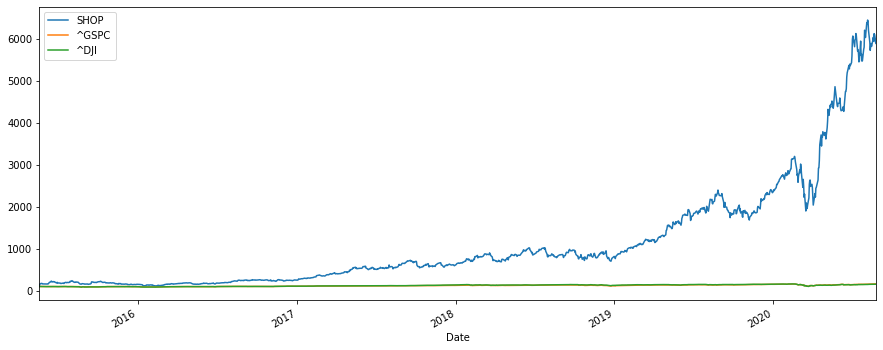

In [22]:
data_2.tail()
(data_2/data_2.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [23]:
ticker2 = ['BABA','MSFT', 'SSNC', 'AMD','BTAI','SNE','ADBE','NVDA','SPGI', 'DIS', 'HON', 'LMT', 'SPY', 'DIA','FB']
security_data1 = pd.DataFrame()
for t in ticker2:
    security_data1[t] = wb.DataReader(t,data_source='yahoo',start='2010-03-04')['Adj Close']

# Calculating the risk of a security

In [24]:
security_data1.tail()

,BABA,MSFT,SSNC,AMD,BTAI,SNE,ADBE,NVDA,SPGI,DIS,HON,LMT,SPY,DIA,FB
Date,,,,,,,,,,,,,,,
2020-08-19,260.589996,209.699997,62.360001,81.089996,41.910000,81.099998,462.010010,485.540009,357.443512,127.769997,156.850006,390.049988,337.230011,276.826965,262.589996
2020-08-20,257.970001,214.580002,62.730000,82.769997,41.180000,79.410004,478.480011,485.640015,360.547729,128.119995,156.169998,387.880005,338.279999,277.265991,269.010010
2020-08-21,265.799988,213.020004,62.369999,83.809998,39.240002,78.750000,473.220001,507.339996,361.336273,127.440002,157.500000,389.570007,339.480011,279.290009,267.010010
2020-08-24,276.019989,213.690002,62.889999,83.080002,37.439999,79.769997,476.299988,508.809998,359.330017,130.690002,159.369995,395.040009,342.920013,283.179993,271.390015
2020-08-25,286.497986,216.070007,63.615002,85.260002,39.205002,79.375000,481.839996,507.950012,358.779999,130.110001,165.179993,393.179993,343.760010,282.150696,282.239990


In [25]:
security_data1.head()

,BABA,MSFT,SSNC,AMD,BTAI,SNE,ADBE,NVDA,SPGI,DIS,HON,LMT,SPY,DIA,FB
Date,,,,,,,,,,,,,,,
2014-09-19,93.889999,42.059528,21.406073,3.81,NaN,17.141150,66.940002,18.297667,80.494545,83.279419,80.716232,154.860565,179.029541,150.873306,77.910004
2014-09-22,89.889999,41.652386,21.334244,3.76,NaN,16.821388,67.199997,18.115458,79.737541,82.175034,79.210625,153.361145,177.646896,149.963379,76.800003
2014-09-23,87.169998,41.209843,21.204947,3.69,NaN,16.831081,67.790001,18.038734,79.111397,81.273117,78.114906,151.090591,176.630020,148.913605,78.290001
2014-09-24,90.570000,41.670086,21.238470,3.70,NaN,16.811699,69.029999,18.144232,79.690819,82.322281,78.482941,152.847076,178.012634,150.295914,78.540001
2014-09-25,88.919998,40.749599,20.979876,3.63,NaN,16.734180,67.709999,17.751040,78.597374,81.052261,77.286804,152.033096,175.140305,148.003754,77.220001


In [26]:
security_returns1 = np.log(security_data1/ security_data1.shift(1))
security_returns1

,BABA,MSFT,SSNC,AMD,BTAI,SNE,ADBE,NVDA,SPGI,DIS,HON,LMT,SPY,DIA,FB
Date,,,,,,,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.043537,-0.009727,-0.003361,-0.013210,NaN,-0.018831,0.003876,-0.010008,-0.009449,-0.013350,-0.018829,-0.009730,-0.007753,-0.006049,-0.014350
2014-09-23,-0.030726,-0.010682,-0.006079,-0.018792,NaN,0.000576,0.008742,-0.004244,-0.007884,-0.011036,-0.013930,-0.014916,-0.005741,-0.007025,0.019215
2014-09-24,0.038263,0.011106,0.001580,0.002706,NaN,-0.001152,0.018126,0.005831,0.007297,0.012827,0.004700,0.011558,0.007797,0.009240,0.003188
2014-09-25,-0.018386,-0.022337,-0.012250,-0.019100,NaN,-0.004622,-0.019307,-0.021909,-0.013816,-0.015548,-0.015358,-0.005340,-0.016267,-0.015368,-0.016950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-19,0.005348,-0.006085,-0.002083,-0.007005,-0.004286,-0.022917,-0.003241,-0.010021,-0.005597,-0.008960,-0.003373,-0.000538,-0.004172,-0.002772,0.000953
2020-08-20,-0.010105,0.023005,0.005916,0.020506,-0.017572,-0.021059,0.035028,0.000206,0.008647,0.002736,-0.004345,-0.005579,0.003109,0.001585,0.024155
2020-08-21,0.029901,-0.007297,-0.005755,0.012487,-0.048256,-0.008346,-0.011054,0.043714,0.002185,-0.005322,0.008480,0.004348,0.003541,0.007273,-0.007462


In [27]:

annual_returns_naushil = security_returns1.mean() * 250
annual_returns_naushil

BABA    0.186806
MSFT    0.274032
SSNC    0.182380
AMD     0.520441
BTAI    0.510542
SNE     0.256648
ADBE    0.330512
NVDA    0.556532
SPGI    0.250255
DIS     0.074712
HON     0.119909
LMT     0.156018
SPY     0.109242
DIA     0.104823
FB      0.215540
dtype: float64

In [28]:

annual_security_risk=security_returns1.std() * 250 ** 0.5
annual_security_risk

BABA    0.326186
MSFT    0.272442
SSNC    0.317729
AMD     0.620675
BTAI    1.132186
SNE     0.309848
ADBE    0.302047
NVDA    0.444382
SPGI    0.268779
DIS     0.255429
HON     0.237715
LMT     0.230517
SPY     0.181789
DIA     0.192450
FB      0.312104
dtype: float64

In [29]:

print (annual_returns_naushil)

BABA    0.186806
MSFT    0.274032
SSNC    0.182380
AMD     0.520441
BTAI    0.510542
SNE     0.256648
ADBE    0.330512
NVDA    0.556532
SPGI    0.250255
DIS     0.074712
HON     0.119909
LMT     0.156018
SPY     0.109242
DIA     0.104823
FB      0.215540
dtype: float64


In [30]:
weights_naushil = np.array([0.046446,0.110351,0.002392,0.039643,0.007536,0.014388,0.122762,0.036249,0.061787,0.104946,0.074780,0.244111,0.067586,0.058792,0.008231])
np.dot(annual_returns_naushil, weights_naushil)

0.21394813244991742

In [31]:

cov_matrix = security_returns1.cov() * 250
cov_matrix

,BABA,MSFT,SSNC,AMD,BTAI,SNE,ADBE,NVDA,SPGI,DIS,HON,LMT,SPY,DIA,FB
BABA,0.106398,0.044055,0.038727,0.068248,0.076107,0.036933,0.045275,0.067451,0.037121,0.026903,0.031093,0.020814,0.031032,0.029944,0.045301
MSFT,0.044055,0.074224,0.047448,0.060148,0.095319,0.041163,0.061498,0.070743,0.047389,0.035847,0.038182,0.030746,0.039864,0.039991,0.051222
SSNC,0.038727,0.047448,0.100952,0.068113,0.107419,0.036801,0.054719,0.063502,0.048723,0.039041,0.042305,0.029687,0.038236,0.038907,0.045433
AMD,0.068248,0.060148,0.068113,0.385237,0.131348,0.059818,0.072566,0.140495,0.058644,0.044987,0.045960,0.034523,0.049630,0.048153,0.057275
BTAI,0.076107,0.095319,0.107419,0.131348,1.281845,0.078178,0.116913,0.156527,0.091154,0.075188,0.078034,0.085637,0.077492,0.078997,0.087188
SNE,0.036933,0.041163,0.036801,0.059818,0.078178,0.096006,0.044011,0.053822,0.038999,0.032989,0.033026,0.027400,0.032376,0.032537,0.036569
ADBE,0.045275,0.061498,0.054719,0.072566,0.116913,0.044011,0.091232,0.075516,0.048118,0.035176,0.035797,0.030182,0.039577,0.038753,0.054524
NVDA,0.067451,0.070743,0.063502,0.140495,0.156527,0.053822,0.075516,0.197475,0.057490,0.043278,0.046881,0.036999,0.049396,0.048593,0.065364
SPGI,0.037121,0.047389,0.048723,0.058644,0.091154,0.038999,0.048118,0.057490,0.072242,0.037809,0.042474,0.028491,0.038206,0.039850,0.040341
DIS,0.026903,0.035847,0.039041,0.044987,0.075188,0.032989,0.035176,0.043278,0.037809,0.065244,0.038091,0.025694,0.032497,0.035041,0.032305


In [32]:
corr_matrix = security_returns1.corr()
corr_matrix

,BABA,MSFT,SSNC,AMD,BTAI,SNE,ADBE,NVDA,SPGI,DIS,HON,LMT,SPY,DIA,FB
BABA,1.000000,0.495747,0.373671,0.337102,0.194228,0.365425,0.459538,0.465335,0.423405,0.322894,0.401000,0.276811,0.523328,0.477010,0.444985
MSFT,0.495747,1.000000,0.548140,0.355700,0.257247,0.487621,0.747337,0.584320,0.647156,0.515124,0.589561,0.489570,0.804902,0.762729,0.602393
SSNC,0.373671,0.548140,1.000000,0.345388,0.243562,0.373815,0.570173,0.449750,0.570527,0.481051,0.560121,0.405325,0.661980,0.636293,0.458152
AMD,0.337102,0.355700,0.345388,1.000000,0.189482,0.311042,0.387073,0.509380,0.351532,0.283762,0.311503,0.241295,0.439858,0.403130,0.295668
BTAI,0.194228,0.257247,0.243562,0.189482,1.000000,0.225118,0.275944,0.269640,0.243938,0.203186,0.223517,0.248981,0.288549,0.271199,0.199337
SNE,0.365425,0.487621,0.373815,0.311042,0.225118,1.000000,0.470258,0.390887,0.468281,0.416817,0.448384,0.383624,0.574792,0.545648,0.378150
ADBE,0.459538,0.747337,0.570173,0.387073,0.275944,0.470258,1.000000,0.562614,0.592707,0.455933,0.498552,0.433487,0.720785,0.666678,0.578380
NVDA,0.465335,0.584320,0.449750,0.509380,0.269640,0.390887,0.562614,1.000000,0.481327,0.381274,0.443798,0.361191,0.611456,0.568193,0.471281
SPGI,0.423405,0.647156,0.570527,0.351532,0.243938,0.468281,0.592707,0.481327,1.000000,0.550711,0.664766,0.459845,0.781929,0.770406,0.480894
DIS,0.322894,0.515124,0.481051,0.283762,0.203186,0.416817,0.455933,0.381274,0.550711,1.000000,0.627329,0.436381,0.699841,0.712839,0.405230


In [33]:
# Calculating Portfolio risk i.e Variance
## numpy.dot can be used to calculate dot product of two arrays

In [34]:
weights_naushil = np.array([0.046446,0.110351,0.002392,
                            0.039643,0.007536,0.014388,
                            0.122762,0.036249,0.061787,
                            0.104946,0.074780,0.244111,
                            0.067586,0.058792,0.008231])


In [35]:
portfolio_var = np.dot(weights_naushil.T, np.dot(security_returns1.cov() * 250, weights_naushil))


In [36]:
portfolio_var

0.042271318471254024


# Portfolio Volatality

In [37]:
portfolio_volatality = np.dot(weights_naushil.T, np.dot(security_returns1.cov() * 250, weights_naushil)) **0.5
portfolio_volatality

0.20559989900594317

In [38]:
print (str(round(portfolio_volatality,5)*100) + '%')

20.560000000000002%


In [39]:
weights_naushil = np.array([0.046446,0.110351,0.002392,0.039643,0.007536,
                            0.014388,0.122762,0.036249,0.061787,0.104946,
                            0.074780,0.244111,0.067586,0.058792,0.008231])

In [40]:
weights_naushil[0]

0.046446

In [41]:
weights_naushil[1]

0.110351

# Diversifiable Risk

In [42]:
BABA_var_a = security_returns1[['BABA']] .var() * 250
MSFT_var_a= security_returns1[['MSFT']] .var() * 250
SSNC_var_a= security_returns1[['SSNC']] .var() * 250
AMD_var_a= security_returns1[['AMD']] .var() * 250
BTAI_var_a= security_returns1[['BTAI']] .var() * 250
SNE_var_a = security_returns1[['SNE']] .var() * 250
ADBE_var_a= security_returns1[['ADBE']] .var() * 250
NVDA_var_a= security_returns1[['NVDA']] .var() * 250
SPGI_var_a= security_returns1[['SPGI']] .var() * 250
DIS_var_a= security_returns1[['DIS']] .var() * 250
HON_var_a= security_returns1[['HON']] .var() * 250
LMT_var_a= security_returns1[['LMT']] .var() * 250
SPY_var_a= security_returns1[['SPY']] .var() * 250
DIA_var_a= security_returns1[['DIA']] .var() * 250
FB_var_a= security_returns1[['FB']] .var() * 250

print (BABA_var_a,MSFT_var_a,SSNC_var_a,AMD_var_a,BTAI_var_a,SNE_var_a,ADBE_var_a,
       NVDA_var_a,SPGI_var_a,DIS_var_a,HON_var_a,LMT_var_a,SPY_var_a,DIA_var_a,FB_var_a)


BABA    0.106398
dtype: float64 MSFT    0.074224
dtype: float64 SSNC    0.100952
dtype: float64 AMD    0.385237
dtype: float64 BTAI    1.281845
dtype: float64 SNE    0.096006
dtype: float64 ADBE    0.091232
dtype: float64 NVDA    0.197475
dtype: float64 SPGI    0.072242
dtype: float64 DIS    0.065244
dtype: float64 HON    0.056508
dtype: float64 LMT    0.053138
dtype: float64 SPY    0.033047
dtype: float64 DIA    0.037037
dtype: float64 FB    0.097409
dtype: float64


In [43]:
individual_var = (BABA_var_a,MSFT_var_a,SSNC_var_a,AMD_var_a,BTAI_var_a,SNE_var_a,ADBE_var_a,
       NVDA_var_a,SPGI_var_a,DIS_var_a,HON_var_a,LMT_var_a,SPY_var_a,DIA_var_a,FB_var_a)

In [44]:
dr = portfolio_var-(weights_naushil[0]**2*BABA_var_a)-(weights_naushil[1]**2*MSFT_var_a)
-(weights_naushil[2]**2*SSNC_var_a)
-(weights_naushil[3]**2*AMD_var_a) - (weights_naushil[4]**2*BTAI_var_a) 
- (weights_naushil[5]**2*SNE_var_a)
- (weights_naushil[6]**2*ADBE_var_a) - (weights_naushil[7]**2*NVDA_var_a)
- (weights_naushil[8]**2*SPGI_var_a) - (weights_naushil[9]**2*DIS_var_a)
- (weights_naushil[10]**2*HON_var_a) - (weights_naushil[11]**2*LMT_var_a)
- (weights_naushil[12]**2*SPY_var_a) - (weights_naushil[13]**2*DIA_var_a) - (weights_naushil[14]**2*FB_var_a)

dr

BABA   NaN
MSFT   NaN
dtype: float64

# Running Regressions

In [45]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
Assets = ['JBLU','DAL', 'CAKE', 'USFD','INTC','SNE','ADBE','NVDA','SPGI', 'DIS', 'HON', 'LMT', 'SPY', 'DIA','FB']
portfolio_data = pd.DataFrame()
for A in Assets:
    portfolio_data[A] = wb.DataReader(A,data_source='yahoo',start = '2015-03-07')['Adj Close']

In [47]:
portfolio_data.tail()

,JBLU,DAL,CAKE,USFD,INTC,SNE,ADBE,NVDA,SPGI,DIS,HON,LMT,SPY,DIA,FB
Date,,,,,,,,,,,,,,,
2020-08-19,10.98,27.670000,25.570000,23.600000,48.330002,81.099998,462.010010,485.540009,357.443512,127.769997,156.850006,390.049988,337.230011,276.826965,262.589996
2020-08-20,10.82,27.620001,25.770000,23.270000,49.169998,79.410004,478.480011,485.640015,360.547729,128.119995,156.169998,387.880005,338.279999,277.265991,269.010010
2020-08-21,10.56,27.270000,26.040001,22.299999,49.279999,78.750000,473.220001,507.339996,361.336273,127.440002,157.500000,389.570007,339.480011,279.290009,267.010010
2020-08-24,11.43,29.799999,27.260000,23.309999,49.139999,79.769997,476.299988,508.809998,359.330017,130.690002,159.369995,395.040009,342.920013,283.179993,271.390015
2020-08-25,11.32,29.808701,27.217800,22.785000,49.439999,79.375000,481.940002,507.829987,358.779999,130.100006,165.169998,393.179993,343.787994,282.150696,282.350006


,JBLU,DAL,CAKE,USFD,INTC,SNE,ADBE,NVDA,SPGI,DIS,HON,LMT,SPY,DIA,FB
JBLU,1.000000,0.778778,0.458035,0.510766,0.277883,0.247812,0.251866,0.244659,0.413151,0.497324,0.566127,0.305733,0.499465,0.520397,0.241097
DAL,0.778778,1.000000,0.441726,0.531426,0.392373,0.312484,0.353575,0.312305,0.486279,0.514119,0.626900,0.364737,0.584609,0.607465,0.292121
CAKE,0.458035,0.441726,1.000000,0.464871,0.353816,0.280191,0.324773,0.279617,0.352160,0.488209,0.494556,0.439790,0.551652,0.569269,0.311885
USFD,0.510766,0.531426,0.464871,1.000000,0.309706,0.290113,0.338902,0.285920,0.486904,0.512695,0.556448,0.338796,0.549317,0.582019,0.326987
INTC,0.277883,0.392373,0.353816,0.309706,1.000000,0.408335,0.569081,0.550743,0.492136,0.467776,0.524251,0.434063,0.705402,0.686353,0.464534
SNE,0.247812,0.312484,0.280191,0.290113,0.408335,1.000000,0.488545,0.401119,0.474414,0.414269,0.460896,0.390421,0.592478,0.560133,0.399992
ADBE,0.251866,0.353575,0.324773,0.338902,0.569081,0.488545,1.000000,0.567780,0.604243,0.457875,0.500117,0.439697,0.729853,0.673640,0.585892
NVDA,0.244659,0.312305,0.279617,0.285920,0.550743,0.401119,0.567780,1.000000,0.480789,0.381211,0.438399,0.357477,0.608044,0.565546,0.471031
SPGI,0.413151,0.486279,0.352160,0.486904,0.492136,0.474414,0.604243,0.480789,1.000000,0.551287,0.666266,0.457694,0.786337,0.774068,0.489731
DIS,0.497324,0.514119,0.488209,0.512695,0.467776,0.414269,0.457875,0.381211,0.551287,1.000000,0.632845,0.434201,0.703752,0.715579,0.408692


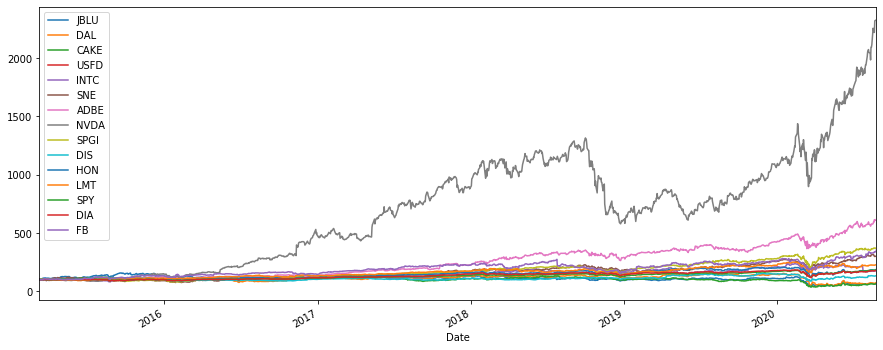

In [48]:
(portfolio_data/portfolio_data.iloc[0]*100).plot(figsize = (15,6))
log_returns = np.log(portfolio_data/portfolio_data.shift(1))
log_returns.mean()*250
log_returns.cov()*250
log_returns.corr()


In [49]:
num_assets = len(Assets)
num_assets

15

# Creating two random weights with NumPy


In [50]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.07911106, 0.06546527, 0.05189542, 0.11944118, 0.04827673,
       0.0433955 , 0.00055339, 0.00565621, 0.13094873, 0.05940409,
       0.11108439, 0.06961238, 0.03404525, 0.06324111, 0.11786928])

In [51]:
weights[0]+weights[1]+weights[2]+weights[3]+weights[4]+weights[5]+weights[6]+weights[7]+weights[8]+weights[9]+weights[10]+weights[11]+weights[12]+weights[13]+weights[14]

1.0


# Weights /= np.sum(weights)
## Generating random weights whose sum equals 1
## Markowitz Mean Variance Theory
## Expected Portfolio Return

In [52]:
np.sum(weights * log_returns.mean()) *250


0.09555840631555856

In [53]:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250 , weights)))

0.2320325420879902

# We are considering 3000 different combinations of same assets by simulating 3000 combinations of their weight values¶

In [54]:
portfolio_returns = []
portfolio_volatalities = []

for x in range (3000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    portfolio_volatalities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250 , weights))))
    
portfolio_returns,portfolio_volatalities

([0.1436305886537284,
  0.14024881690800406,
  0.10129174324103674,
  0.1601612534383373,
  0.16355220299695142,
  0.16000390837412334,
  0.12107527769283692,
  0.14916450863522557,
  0.10162479322237186,
  0.16801358216499754,
  0.13659793768163492,
  0.14608204145461845,
  0.16039652945001123,
  0.19688224874834287,
  0.16228936005177766,
  0.10315433912567518,
  0.15634430733259744,
  0.1466704326780187,
  0.1046823128799792,
  0.1231187496249718,
  0.1604586008097487,
  0.1025245480887981,
  0.15901117173026985,
  0.1297684986343303,
  0.14192008215904517,
  0.14156656315901045,
  0.13848390806270822,
  0.16019958624036035,
  0.11859272122920171,
  0.13644245184263112,
  0.15352742212802867,
  0.16168250709855242,
  0.13046072229146324,
  0.1089345691844912,
  0.1487513864131731,
  0.16133903568377536,
  0.08620400831366645,
  0.1548343867398487,
  0.1557400380432899,
  0.13070514087499546,
  0.1293342409563327,
  0.1342378391871869,
  0.12012615738514659,
  0.15398935339268482,
  

# Converting the lists into Numpy Arrays

Text(0, 0.5, 'Expected Return')

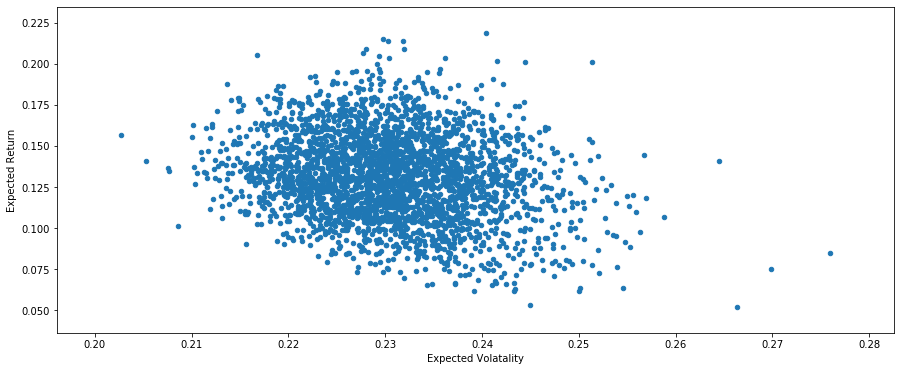

In [55]:
N_portfolio = pd.DataFrame({'Return':portfolio_returns, 'Volatality':portfolio_volatalities })
N_portfolio.plot(x='Volatality',y='Return',kind='scatter',figsize = (15,6))
plt.xlabel('Expected Volatality')
plt.ylabel('Expected Return')